# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


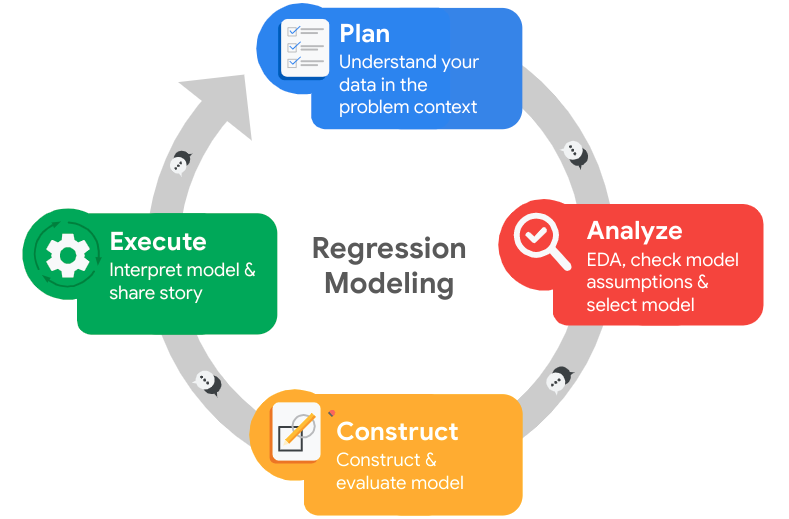

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- Stakeholders are Salifort Motors' senior leadership team and their HR department;

- What we are trying to solve is to understand why employees are leaving the company, since their idea is to invest on employees and keep the talents;

- My initial obeservation is that the data seems reliable and organized, as the research was conducted by the HR team of the company. More details will come while we inspect the data closer;

- Best resources I will use are python and the libraries like numpy, pandas, seaborn and matplotlib;

- At the moment no ethical considerations since the data has no private information like names or employee number.


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [280]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [281]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [4]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [282]:
# Rename columns as needed
df0.rename(columns={"number_project": "number_projects", 
                    "average_monthly_hours": "av_hours_worked_month",
                    "time_spend_company": "years_since_started",
                    "Work_accident": "had_work_accident",
                    "left": "left_company",
                    "promotion_last_5years": "promoted_last_5years",
                    "Department": "department"
                   }, inplace=True)



# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_montly_hours', 'years_since_started', 'had_work_accident',
       'left_company', 'promoted_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()


satisfaction_level      0
last_evaluation         0
number_projects         0
average_montly_hours    0
years_since_started     0
had_work_accident       0
left_company            0
promoted_last_5years    0
department              0
salary                  0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0[df0.duplicated()]


,satisfaction_level,last_evaluation,number_projects,average_montly_hours,years_since_started,had_work_accident,left_company,promoted_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
# Inspect some rows containing duplicates as needed
df0.iloc[396]


satisfaction_level       0.46
last_evaluation          0.57
number_projects             2
average_montly_hours      139
years_since_started         3
had_work_accident           0
left_company                1
promoted_last_5years        0
department              sales
salary                    low
Name: 396, dtype: object

In [283]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_projects,average_montly_hours,years_since_started,had_work_accident,left_company,promoted_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

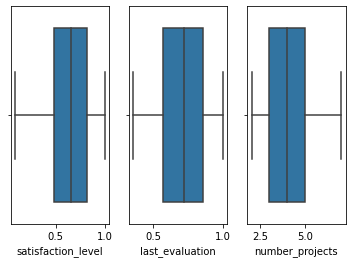

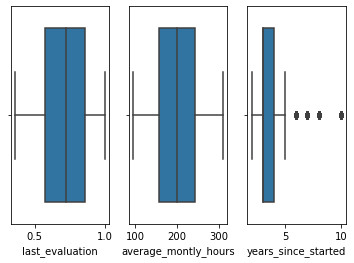

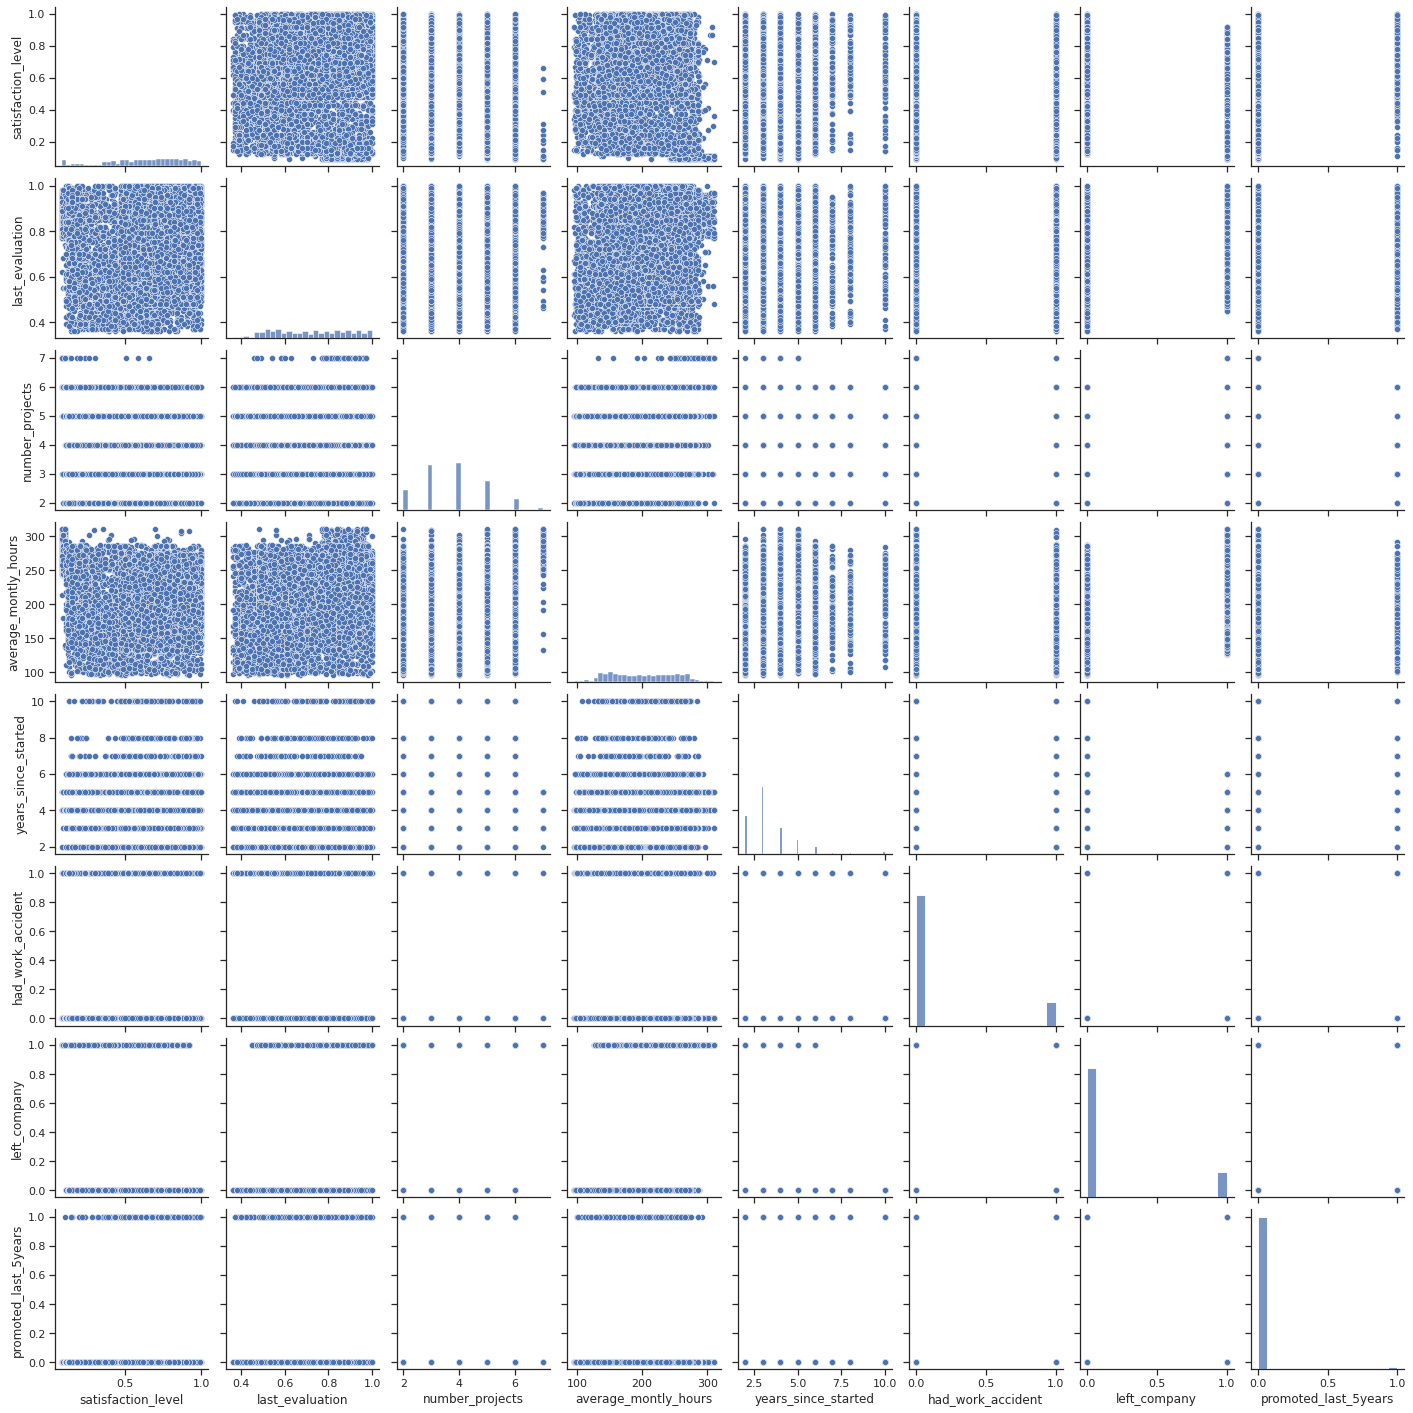

In [7]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

f, axes = plt.subplots(1, 3)
sns.boxplot(x=df1['satisfaction_level'],  orient='v' , ax=axes[0])
sns.boxplot(x=df1['last_evaluation'],  orient='v' , ax=axes[1])
sns.boxplot(x=df1['number_projects'],  orient='v' , ax=axes[2])


f1, axes1 = plt.subplots(1, 3)
sns.boxplot(x=df1['last_evaluation'],  orient='v' , ax=axes1[0])
sns.boxplot(x=df1['average_montly_hours'],  orient='v' , ax=axes1[1])
sns.boxplot(x=df1['years_since_started'],  orient='v' , ax=axes1[2])


#Not required to check only 0 and 1
#f2, axes2 = plt.subplots(1, 3)
#sns.boxplot(x=df1['had_work_accident'], orient='v' , ax=axes2[0])
#sns.boxplot(x=df1['left_company'], orient='v' , ax=axes2[1])
#sns.boxplot(x=df1['promoted_last_5years'], orient='v' , ax=axes2[2])

#Categorical not required to check
#sns.boxplot(x=df1['department'])
#sns.boxplot(x=df1['salary'])



sns.set_theme(style="ticks")

sns.pairplot(df1)


In [76]:
# Determine the number of rows containing outliers
#Apparently only years_since_started has outliers (employees with +5 years since started)

#Scatterplot matrix also doesn't show relationship between the variables

df1[df1['years_since_started'] > 5]


,satisfaction_level,last_evaluation,number_projects,average_montly_hours,years_since_started,had_work_accident,left_company,promoted_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- There are no statistical relationships in the data, scatter matrix shows that;

- They are normally distributed with few outliers;

- Checked for missing data but nothing was found, only some registers were duplicated and were removed;

- Models should work with numerical data so transformations are necessary;

- Same tools as before and also no ethical concernings at this stage.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [12]:
# Get numbers of people who left vs. stayed
print(df1['left_company'].value_counts())

# 1991 employees left while 10000 stayed

# Get percentages of people who left vs. stayed
print((df1['left_company'].value_counts() / df1['left_company'].value_counts().sum())*100)

# 83.4% stayed while 16.6 left


0    10000
1     1991
Name: left_company, dtype: int64
0    83.39588
1    16.60412
Name: left_company, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

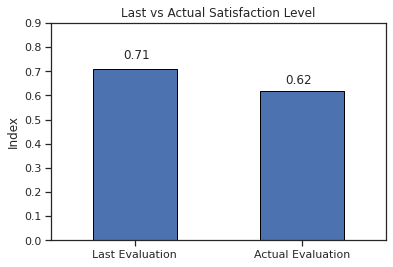

In [8]:
# Create a plot as needed
df1[['last_evaluation', 'satisfaction_level']].mean()

eval_means = pd.DataFrame(data=[[0.71, 0.62]], columns=['Last Evaluation', 'Actual Evaluation'], index=['Evaluation Rate'])


eval_means.mean().plot(kind='bar',
                        rot=0,
                        title='Last vs Actual Satisfaction Level',
                        edgecolor='black',
                        ylim=(0,0.9),
                        ylabel='Index')

plt.text(-0.07, 0.75, '0.71')
plt.text(0.9, 0.65, '0.62')

plt.show()

#We can see that employees are less satisfied compared to last research

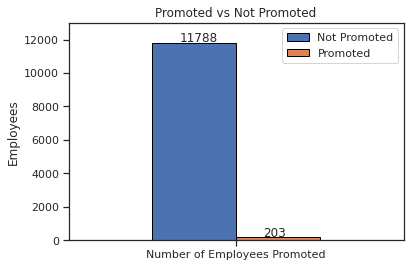

0    11788
1      203
Name: promoted_last_5years, dtype: int64

In [13]:
# Create a plot as needed
promo_not_promo = pd.DataFrame(data=[[11788, 203]], columns=['Not Promoted', 'Promoted'], index=['Number of Employees Promoted'])
promo_not_promo


promo_not_promo.plot(kind='bar',
                    ylabel='Employees',
                    rot=0,
                    ylim=(0,13000),
                    edgecolor='black',
                    title='Promoted vs Not Promoted',
                    )


plt.text(-0.17, 11888, '11788')
plt.text(0.08, 223, '203')
plt.show()

df1['promoted_last_5years'].value_counts()

# Almost all employees that left the company weren't promoted in last 5 years, only 203 (1.69%) from 11788 were promoted.

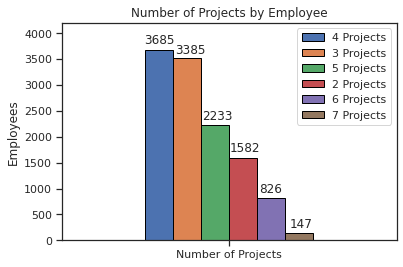

In [267]:
# Create a plot as needed
df1['number_projects'].value_counts()

num_proj = pd.DataFrame(data=[[3685, 3520, 2233, 1582, 826, 147]], columns=['4 Projects', '3 Projects', '5 Projects', '2 Projects', '6 Projects', '7 Projects'], index=['Number of Projects'])
num_proj

num_proj.plot(kind='bar',
                    ylabel='Employees',
                    rot=0,
                    ylim=(0,4200),
                    edgecolor='black',
                    title='Number of Projects by Employee',
                    )


plt.text(-0.255, 3800, '3685')
plt.text(-0.16, 3600, '3385')
plt.text(-0.08, 2333, '2233')
plt.text(0.002, 1703, '1582')
plt.text(0.09, 920, '826')
plt.text(0.18, 250, '147')
plt.show()

# We can see that Most part of employees present more than one project, besides no promotions.

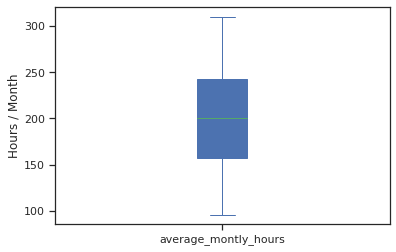

Employees working +250h/month: 2410 

Employees working -150h/month: 2241 

Employees working between 150h and 250h/month: 7340


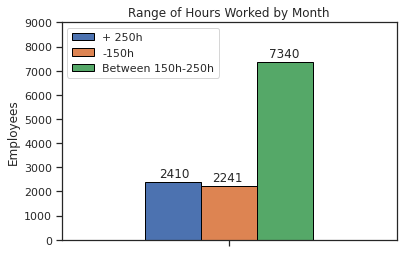

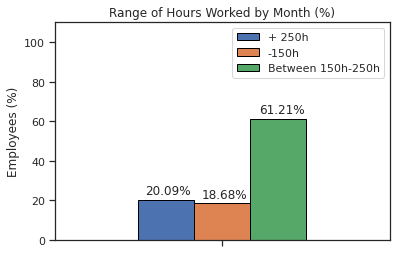

In [10]:
# Create a plot as needed
df1['average_montly_hours'].plot(kind='box',
                                patch_artist=True,
                                #color='black',
                                #notch=True,
                                ylabel='Hours / Month',

                                )
                                 
plt.show()

print('Employees working +250h/month:', df1[df1['average_montly_hours'] > 250].shape[0], '\n')

print('Employees working -150h/month:', df1[df1['average_montly_hours'] < 150].shape[0], '\n')

print('Employees working between 150h and 250h/month:', (df1[(df1['average_montly_hours'] >= 150) & (df1['average_montly_hours'] <= 250)].shape[0]))
# Most part of employees work from 150h to 250h per month. Let's check the quantity

hours_worked = pd.DataFrame(data=[[2410, 2241, 7340]], columns=['+ 250h', '-150h', 'Between 150h-250h'], index=[''])


hours_worked.plot(kind='bar',
                    ylabel='Employees',
                    rot=0,
                    ylim=(0,9000),
                    edgecolor='black',
                    title='Range of Hours Worked by Month',
                    )
plt.text(-0.21, 2610, '2410')
plt.text(-0.05, 2441, '2241')
plt.text(0.12, 7540, '7340')
plt.show()




hours_worked_perc = (hours_worked / hours_worked.sum().sum())*100

hours_worked_perc.plot(kind='bar',
                    ylabel='Employees (%)',
                    rot=0,
                    ylim=(0,110),
                    edgecolor='black',
                    title='Range of Hours Worked by Month (%)',
                    )
plt.text(-0.23, 23, '20.09%')
plt.text(-0.06, 21, '18.68%')
plt.text(0.11, 64, '61.21%')
plt.show()

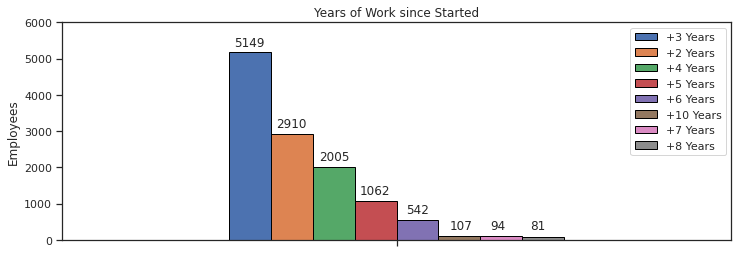

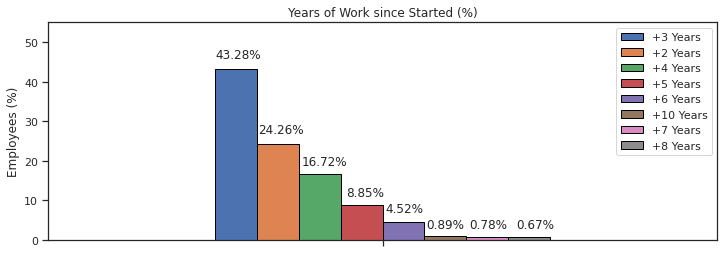

In [16]:
df1['years_since_started'].value_counts()


yrs_since_start = pd.DataFrame(data=[[5190, 2910, 2005, 1062, 542, 107, 94, 81]], columns=['+3 Years', '+2 Years', '+4 Years', '+5 Years', '+6 Years', '+10 Years', '+7 Years', '+8 Years'], index=[''])
yrs_since_start


yrs_since_start.plot(kind='bar',
                    ylabel='Employees',
                    figsize=(12,4),
                    rot=0,
                    ylim=(0,6000),
                    edgecolor='black',
                    title='Years of Work since Started',
                    )
plt.text(-0.243, 5349, '5149')
plt.text(-0.18, 3110, '2910')
plt.text(-0.115, 2205, '2005')
plt.text(-0.055, 1262, '1062')
plt.text(0.015, 742, '542')
plt.text(0.08, 307, '107')
plt.text(0.14, 294, '94')
plt.text(0.20, 281, '81')
plt.show()



yrs_since_start_perc = (yrs_since_start / yrs_since_start.sum().sum())*100


yrs_since_start_perc.plot(kind='bar',
                    ylabel='Employees (%)',
                    figsize=(12,4),
                    rot=0,
                    ylim=(0,55),
                    edgecolor='black',
                    title='Years of Work since Started (%)',
                    )
plt.text(-0.25, 46, '43.28%')
plt.text(-0.185, 27, '24.26%')
plt.text(-0.12, 19, '16.72%')
plt.text(-0.055, 11, '8.85%')
plt.text(0.005, 7, '4.52%')
plt.text(0.065, 3, '0.89%')
plt.text(0.13, 3, '0.78%')
plt.text(0.20, 3, '0.67%')
plt.show()

# We can see that 84% of the employees have +3, +2 or +4 years of work respectively, 
# so it doesn't seem it's a company with relatively new employees.

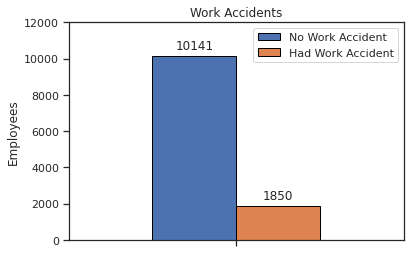

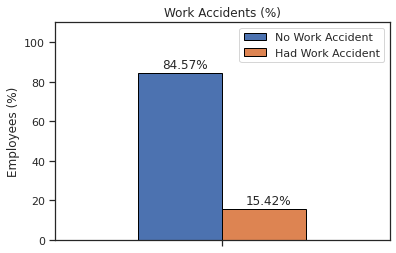

In [11]:
# Create a plot as needed
df1['had_work_accident'].value_counts()

work_accident = pd.DataFrame(data=[[10141, 1850]], columns=['No Work Accident', 'Had Work Accident'], index=[''])


work_accident.plot(kind='bar',
                    ylabel='Employees',
                    figsize=(6,4),
                    rot=0,
                    ylim=(0,12000),
                    edgecolor='black',
                    title='Work Accidents',
                    )

plt.text(-0.18, 10541, '10141')
plt.text(0.08, 2250, '1850')
plt.show()


work_accident_perc = (work_accident / work_accident.sum().sum())*100

work_accident_perc.plot(kind='bar',
                    ylabel='Employees (%)',
                    figsize=(6,4),
                    rot=0,
                    ylim=(0,110),
                    edgecolor='black',
                    title='Work Accidents (%)',
                    )

plt.text(-0.18, 87, '84.57%')
plt.text(0.07, 18, '15.42%')
plt.show()

# There is a high rate of accidents, about 15% had accidents already (1850 employees)

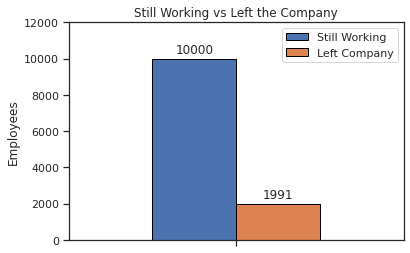

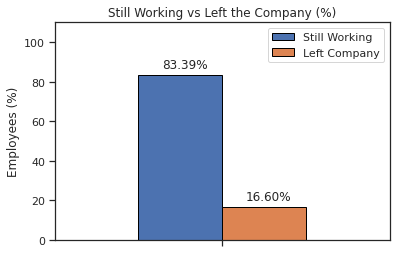

In [55]:
# Create a plot as needed
df1['left_company'].value_counts()


left_company = pd.DataFrame(data=[[10000, 1991]], columns=['Still Working', 'Left Company'], index=[''])

left_company.plot(kind='bar',
                    ylabel='Employees',
                    figsize=(6,4),
                    rot=0,
                    ylim=(0,12000),
                    edgecolor='black',
                    title='Still Working vs Left the Company',
                    )

plt.text(-0.18, 10300, '10000')
plt.text(0.08, 2291, '1991')
plt.show()


left_company_perc = (left_company / left_company.sum().sum())*100
left_company_perc

left_company_perc.plot(kind='bar',
                    ylabel='Employees (%)',
                    figsize=(6,4),
                    rot=0,
                    ylim=(0,110),
                    edgecolor='black',
                    title='Still Working vs Left the Company (%)',
                    )

plt.text(-0.18, 87, '83.39%')
plt.text(0.07, 20, '16.60%')
plt.show()

# There is a churn rate of 16.60% (1991 employees). It seems a big churn rate.

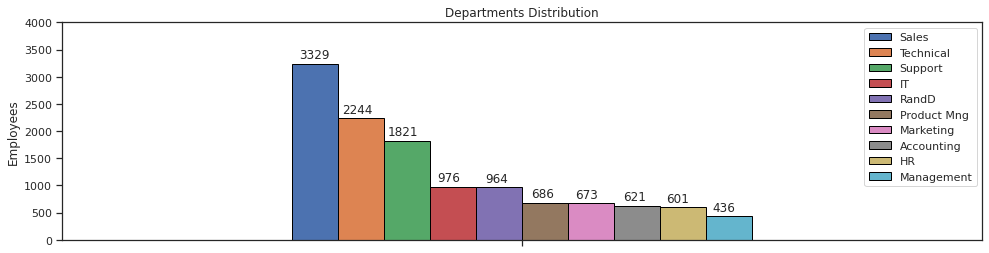

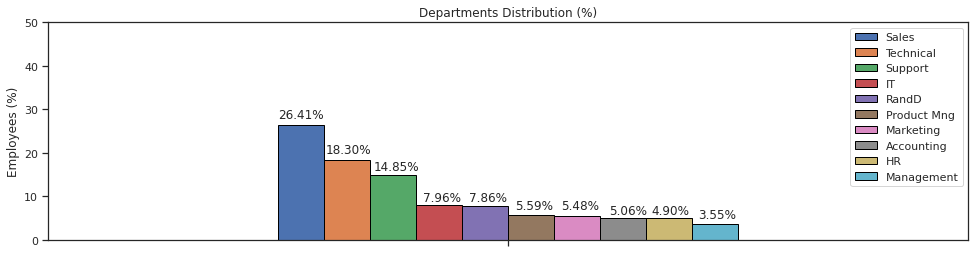

In [22]:
# Create a plot as needed
df1['department'].value_counts()
departments = pd.DataFrame(data=[[3239, 2244, 1821, 976, 964, 686, 673, 621, 601, 436]], 
                           columns=['Sales', 'Technical', 'Support', 'IT', 'RandD', 'Product Mng', 'Marketing', 'Accounting', 'HR', 'Management'], index=[''])
departments

departments.plot(kind='bar',
                    ylabel='Employees',
                    figsize=(16.5,4),
                    rot=0,
                    ylim=(0,4000),
                    edgecolor='black',
                    title='Departments Distribution',
                    )

plt.text(-0.242, 3349, '3329')
plt.text(-0.195, 2334, '2244')
plt.text(-0.146, 1921, '1821')
plt.text(-0.092, 1076, '976')
plt.text(-0.04, 1064, '964')
plt.text(0.01, 789, '686')
plt.text(0.058, 773, '673')
plt.text(0.11, 721, '621')
plt.text(0.156, 701, '601')
plt.text(0.207, 536, '436')
plt.show()


departments_perc = (departments / departments.sum().sum())*100
departments_perc

departments_perc.plot(kind='bar',
                    ylabel='Employees (%)',
                    figsize=(16.5,4),
                    rot=0,
                    ylim=(0,50),
                    edgecolor='black',
                    title='Departments Distribution (%)',
                    )

plt.text(-0.25, 28, '26.41%')
plt.text(-0.198, 20, '18.30%')
plt.text(-0.146, 16, '14.85%')
plt.text(-0.092, 9, '7.96%')
plt.text(-0.042, 9, '7.86%')
plt.text(0.008, 7, '5.59%')
plt.text(0.058, 7, '5.48%')
plt.text(0.11, 6, '5.06%')
plt.text(0.156, 6, '4.90%')
plt.text(0.207, 5, '3.55%')
plt.show()

# The biggest department is Sales 26% (3329), followed by Technical 18% (2244) and Support (1821).
# The other departments have from 3% to 8% (around 5000 in total)

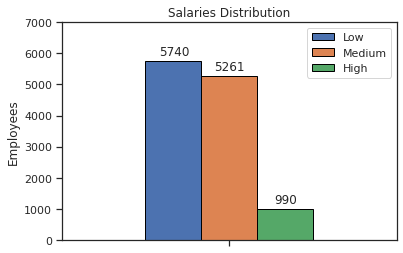

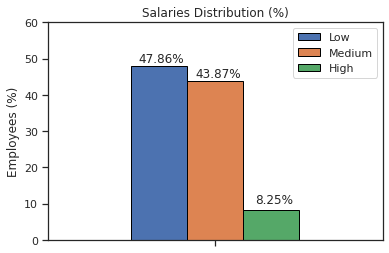

In [21]:
df1['salary'].value_counts()

salaries = pd.DataFrame(data=[[5740, 5261, 990]], columns=['Low', 'Medium', 'High'], index=[''])
salaries

salaries.plot(kind='bar',
                    ylabel='Employees',
                    figsize=(6,4),
                    rot=0,
                    ylim=(0,7000),
                    edgecolor='black',
                    title='Salaries Distribution',
                    )

plt.text(-0.21, 5940, '5740')
plt.text(-0.045, 5461, '5261')
plt.text(0.135, 1190, '990')
plt.show()


salaries_perc = (salaries / salaries.sum().sum())*100
salaries_perc

salaries_perc.plot(kind='bar',
                    ylabel='Employees (%)',
                    figsize=(6,4),
                    rot=0,
                    ylim=(0,60),
                    edgecolor='black',
                    title='Salaries Distribution (%)',
                    )

plt.text(-0.23, 49, '47.86%')
plt.text(-0.06, 45, '43.87%')
plt.text(0.12, 10, '8.25%')
plt.show()

# Regarding salaries, most part have low salaries, 47% (5740), 
# followed by medium with 43% (5261) and high 8% (990)

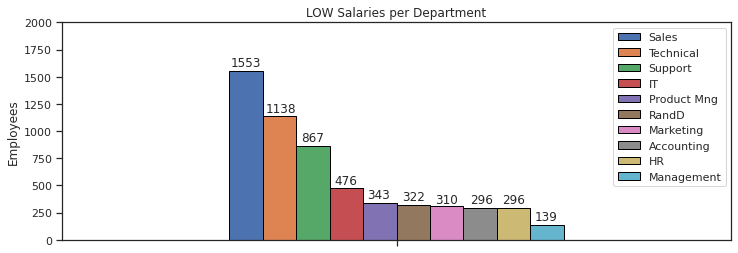

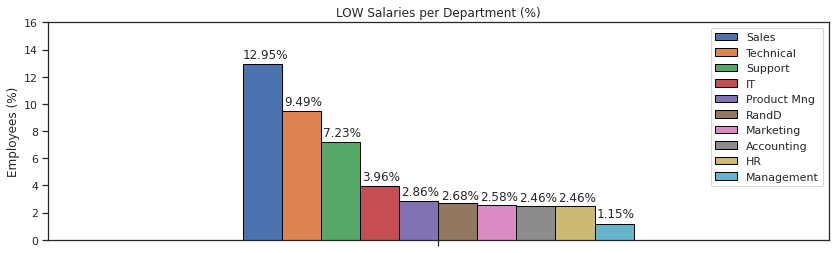

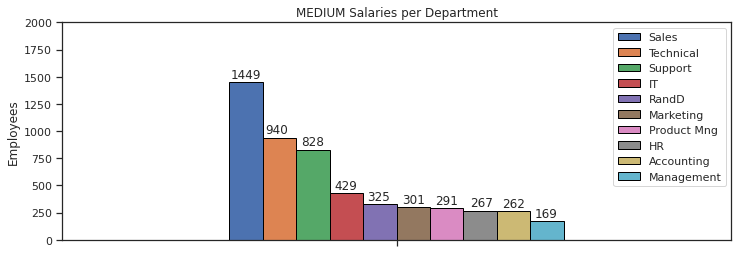

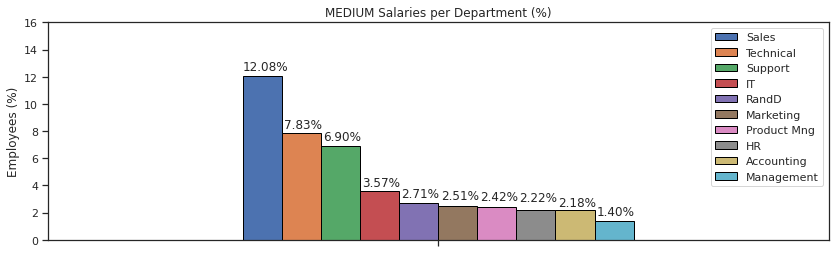

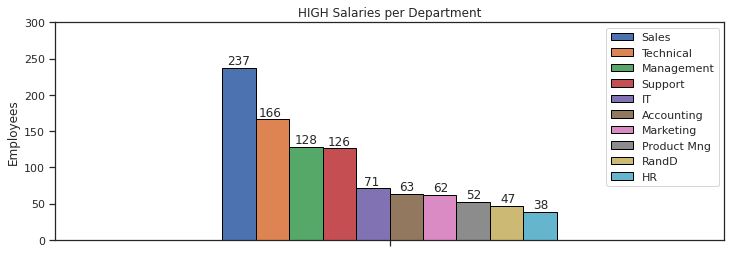

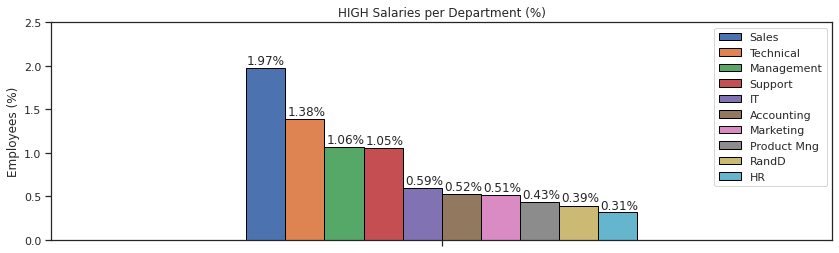

In [266]:
# Separating per income range
salary_dep_low = df1[df1[['department', 'salary']]['salary'] == 'low']['department'].value_counts()
salary_dep_medium = df1[df1[['department', 'salary']]['salary'] == 'medium']['department'].value_counts()
salary_dep_high = df1[df1[['department', 'salary']]['salary'] == 'high']['department'].value_counts()



# Plot LOW
salary_dep_low_df = pd.DataFrame(data=[[1553, 1138, 867, 476, 343, 322, 310, 296, 296, 139]], 
             columns=['Sales', 'Technical', 'Support', 'IT', 'Product Mng', 'RandD', 'Marketing', 'Accounting', 'HR', 'Management'], index=[''])
            
salary_dep_low_df.plot(kind='bar',
                    ylabel='Employees',
                    figsize=(12,4),
                    rot=0,
                    ylim=(0,2000),
                    edgecolor='black',
                    title='LOW Salaries per Department',
                    )

plt.text(-0.247, 1593, '1553')
plt.text(-0.196, 1178, '1138')
plt.text(-0.142, 907, '867')
plt.text(-0.092, 516, '476')
plt.text(-0.044, 383, '343')
plt.text(0.008, 362, '322')
plt.text(0.058, 340, '310')
plt.text(0.11, 336, '296')
plt.text(0.158, 336, '296')
plt.text(0.207, 179, '139')
plt.show()

# Plot LOW %
salary_dep_low_perc = (salary_dep_low_df / df1.shape[0])*100

salary_dep_low_perc.plot(kind='bar',
                    ylabel='Employees (%)',
                    figsize=(14,4),
                    rot=0,
                    ylim=(0,16),
                    edgecolor='black',
                    title='LOW Salaries per Department (%)',
                    )

plt.text(-0.25, 13.35, '12.95%')
plt.text(-0.197, 9.89, '9.49%')
plt.text(-0.147, 7.63, '7.23%')
plt.text(-0.097, 4.36, '3.96%')
plt.text(-0.047, 3.32, '2.86%')
plt.text(0.003, 3.02, '2.68%')
plt.text(0.053, 2.90, '2.58%')
plt.text(0.103, 2.86, '2.46%')
plt.text(0.153, 2.86, '2.46%')
plt.text(0.203, 1.65, '1.15%')
plt.show()


# Plot MED
salary_dep_medium_df = pd.DataFrame(data=[[1449, 940, 828, 429, 325, 301, 291, 267, 262, 169]], 
             columns=['Sales', 'Technical', 'Support', 'IT', 'RandD', 'Marketing', 'Product Mng', 'HR', 'Accounting',  'Management'], index=[''])


salary_dep_medium_df.plot(kind='bar',
                    ylabel='Employees',
                    figsize=(12,4),
                    rot=0,
                    ylim=(0,2000),
                    edgecolor='black',
                    title='MEDIUM Salaries per Department',
                    )

plt.text(-0.247, 1489, '1449')
plt.text(-0.196, 980, '940')
plt.text(-0.142, 868, '828')
plt.text(-0.092, 469, '429')
plt.text(-0.044, 365, '325')
plt.text(0.008, 341, '301')
plt.text(0.058, 331, '291')
plt.text(0.11, 307, '267')
plt.text(0.158, 302, '262')
plt.text(0.207, 209, '169')
plt.show()

# Plot MED %
salary_dep_medium_perc = (salary_dep_medium_df / df1.shape[0])*100

salary_dep_medium_perc.plot(kind='bar',
                    ylabel='Employees (%)',
                    figsize=(14,4),
                    rot=0,
                    ylim=(0,16),
                    edgecolor='black',
                    title='MEDIUM Salaries per Department (%)',
                    )

plt.text(-0.25, 12.48, '12.08%')
plt.text(-0.197, 8.23, '7.83%')
plt.text(-0.147, 7.30, '6.90%')
plt.text(-0.097, 3.97, '3.57%')
plt.text(-0.047, 3.11, '2.71%')
plt.text(0.003, 3.01, '2.51%')
plt.text(0.053, 2.92, '2.42%')
plt.text(0.103, 2.82, '2.22%')
plt.text(0.153, 2.48, '2.18%')
plt.text(0.203, 1.80, '1.40%')
plt.show()

# Plot HIGH
salary_dep_high_df = pd.DataFrame(data=[[237, 166, 128, 126, 71, 63, 62, 52, 47, 38]], 
             columns=['Sales', 'Technical', 'Management', 'Support', 'IT', 'Accounting', 'Marketing', 'Product Mng', 'RandD',  'HR'], index=[''])


salary_dep_high_df.plot(kind='bar',
                    ylabel='Employees',
                    figsize=(12,4),
                    rot=0,
                    ylim=(0,300),
                    edgecolor='black',
                    title='HIGH Salaries per Department',
                    )

plt.text(-0.242, 242, '237')
plt.text(-0.195, 171, '166')
plt.text(-0.142, 133, '128')
plt.text(-0.092, 131, '126')
plt.text(-0.038, 76, '71')
plt.text(0.015, 68, '63')
plt.text(0.065, 67, '62')
plt.text(0.115, 57, '52')
plt.text(0.165, 52, '47')
plt.text(0.215, 43, '38')
plt.show()

# Plot HIGH %
salary_dep_high_perc = (salary_dep_high_df / df1.shape[0])*100

salary_dep_high_perc.plot(kind='bar',
                    ylabel='Employees (%)',
                    figsize=(14,4),
                    rot=0,
                    ylim=(0,2.5),
                    edgecolor='black',
                    title='HIGH Salaries per Department (%)',
                    )

plt.text(-0.25, 2.02, '1.97%')
plt.text(-0.197, 1.43, '1.38%')
plt.text(-0.147, 1.11, '1.06%')
plt.text(-0.097, 1.1, '1.05%')
plt.text(-0.047, 0.64, '0.59%')
plt.text(0.003, 0.57, '0.52%')
plt.text(0.053, 0.56, '0.51%')
plt.text(0.103, 0.48, '0.43%')
plt.text(0.153, 0.44, '0.39%')
plt.text(0.203, 0.35, '0.31%')
plt.show()


# Breaking down the salaries by department, Sales 12.95% (1553), Technical 9.49% (1138), 
# Support 7.23% (867) and IT 3.96% (476) lead as the LOWEST salaries.

# Same happens with MEDIUM, but values are Sales 12.08% (1449), Technical 7.83% (940), 
# Support 6.90% (828) and IT 3.57% (429).

# High salaries as expected is a small part of the company, values by department are
# Sales 1.97% (237), Technical 1.38% (166), Management 1.06% (128) and Support 1.05% (126).

# The detail here on High Salaries is that Support gives place to Management,
# while IT leaves the top 4 giving place to Support.

# It's also interesting to observe there are more high salaries in Sales and Technical than Management.

### Insights

- The last company evaluation made by employees was better than now (decreased from 0.71 to 0.61);


- The comapany doesn't seem to promote the employees, in the last 5 years, 
  only 203 (1.69%) from 11788 were promoted;
  
  
- Besides no promotions, we can see that most part of employees present more than one project;


- Most part of employees 61% (7340) work from 150h to 250h per month, 
  while 19% (2241) work less than 150h and 20% (2410) more than 250h;


- We can see that 84% of the employees have +3, +2 or +4 years of work respectively, 
  so it doesn't seem it's a company with relatively new employees;


- There is a high rate of accidents, about 15% had accidents already (1850 employees);


- There is a churn rate of 16.60% (1991 employees). It seems a big churn rate;


- The biggest department is Sales 26% (3329), followed by Technical 18% (2244) and Support (1821).
  The other departments have from 3% to 8% (around 5000 employees in total);


- Regarding salaries, most part have low salaries, 47% (5740), 
  followed by medium with 43% (5261) and high 8% (990);


- Breaking down the salaries by department, Sales 12.95% (1553), Technical 9.49% (1138), 
  Support 7.23% (867) and IT 3.96% (476) lead as the LOWEST salaries.


- Same happens with MEDIUM, but values are Sales 12.08% (1449), Technical 7.83% (940), 
  Support 6.90% (828) and IT 3.57% (429).


- High salaries as expected is a small part of the company, values by department are
  Sales 1.97% (237), Technical 1.38% (166), Management 1.06% (128) and Support 1.05% (126).


- The detail here on High Salaries is that Support gives place to Management,
  while IT leaves the top 4 giving place to Support.


- It's also interesting to observe there are more high salaries in Sales and Technical than Management.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- Nothing odd I could realize;


- I used all variables first to make sure they are useful as on first observation none seem not useful;

- For XGBoost the assumptions are met;


- It took about 35 min to fit;


- Yes, still improvable, but 30min can be better in better environments and the results seem good;


- Scikitlearn https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


- All good regarding ethics here.


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

If employee left the company or not.

### Identify the types of models most appropriate for this task.

XGboost seem good here as no linear relationships found in the data features.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay


from xgboost import XGBClassifier
from xgboost import plot_importance

In [285]:
df2 = pd.get_dummies(df1, dtype=int)

df2['left_company'].value_counts(normalize=True) # a little unbalanced but let's go ahead

0    0.833959
1    0.166041
Name: left_company, dtype: float64

In [286]:
y = df2['left_company']

X = df2.drop('left_company',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

xgb = XGBClassifier(objective='binary:logistic', random_state=0)

In [287]:
cv_params = {'max_depth': [2, 4],
              'min_child_weight': [5, 8],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [10,15,25],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

scoring = ['accuracy', 'precision', 'recall', 'f1']

In [288]:
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'accuracy',
                      verbose=2
                     )

In [289]:
%%time
xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=10, subsample=0.7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=10, subsample=0.7, total=  14.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=10, subsample=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.5s remaining:    0.0s


[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=10, subsample=0.7, total=  13.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=10, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=10, subsample=0.7, total=  13.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=10, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=10, subsample=0.7, total=  14.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=10, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=10, subsample=0.7, total=  15.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=15, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_d

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 35.0min finished


CPU times: user 1h 10min 2s, sys: 6.52 s, total: 1h 10min 8s
Wall time: 35min 8s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 

In [290]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 25,
 'subsample': 0.7}

In [291]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [292]:
results = make_results('XGB cv', xgb_cv, 'accuracy')
results

,model,precision,recall,F1,accuracy
0,XGB cv,0.972744,0.906533,0.93823,0.979873


In [293]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [294]:
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,XGB cv,0.972744,0.906533,0.938230,0.979873
0,XGB test,0.966887,0.927966,0.947027,0.983656


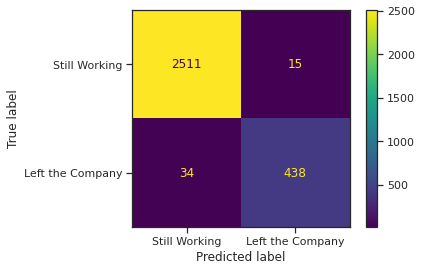

In [302]:
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Still Working', 'Left the Company'],
                             )
disp.plot(values_format='')
plt.show()

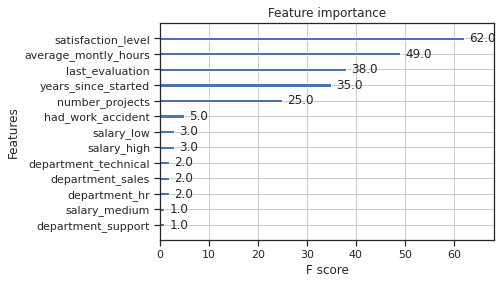

In [304]:
plot_importance(xgb_cv.best_estimator_)
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- The model was very good an can predict very well, it can help HR predict future employees that will leave;


- They can use the model for employees not considered in this study;


- HR could add more features for the study without compromissing ethics like age, sex, experience etc;


- The model could be improved, for sure, maybe removing some features that didn't contribute for the predictions,
  what could lead to a better training time and better accuracy too;
  
  
- I think the study could show many reasons that could be contributing for the employees to leave,
  like high index of accidents, low salaries, lack of promotions, high worked hours per month etc;
  
  
- No ethical concerns in this stage too.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

- XGBoost model had an accuracy of approx 98% on predicting employees who left the company or not;


- The variables that contributed more to the predictions were the satisfaction_level, average_monthly_hours, last_evaluation, years_since_started and number_projects;

### Conclusion, Recommendations, Next Steps

- The company has valuable insights that could help to decrease the employee churn rate;


- HR could increase the information collected for the study, with more features, more insights can be discovered.

## Thank you :) 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.